In [31]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
feature = ["Pclass","Sex","Age","Fare","Embarked"]
target = ["Survived"]

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(strategy='median')
df[["Age"]]= imp_median.fit_transform(df[["Age"]])
imp_frq = SimpleImputer(strategy='most_frequent')
df[["Embarked"]]= imp_frq.fit_transform(df[["Embarked"]])

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])


In [21]:
X = df[feature]
y = df[target]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [26]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [27]:
#no pruning
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7821229050279329

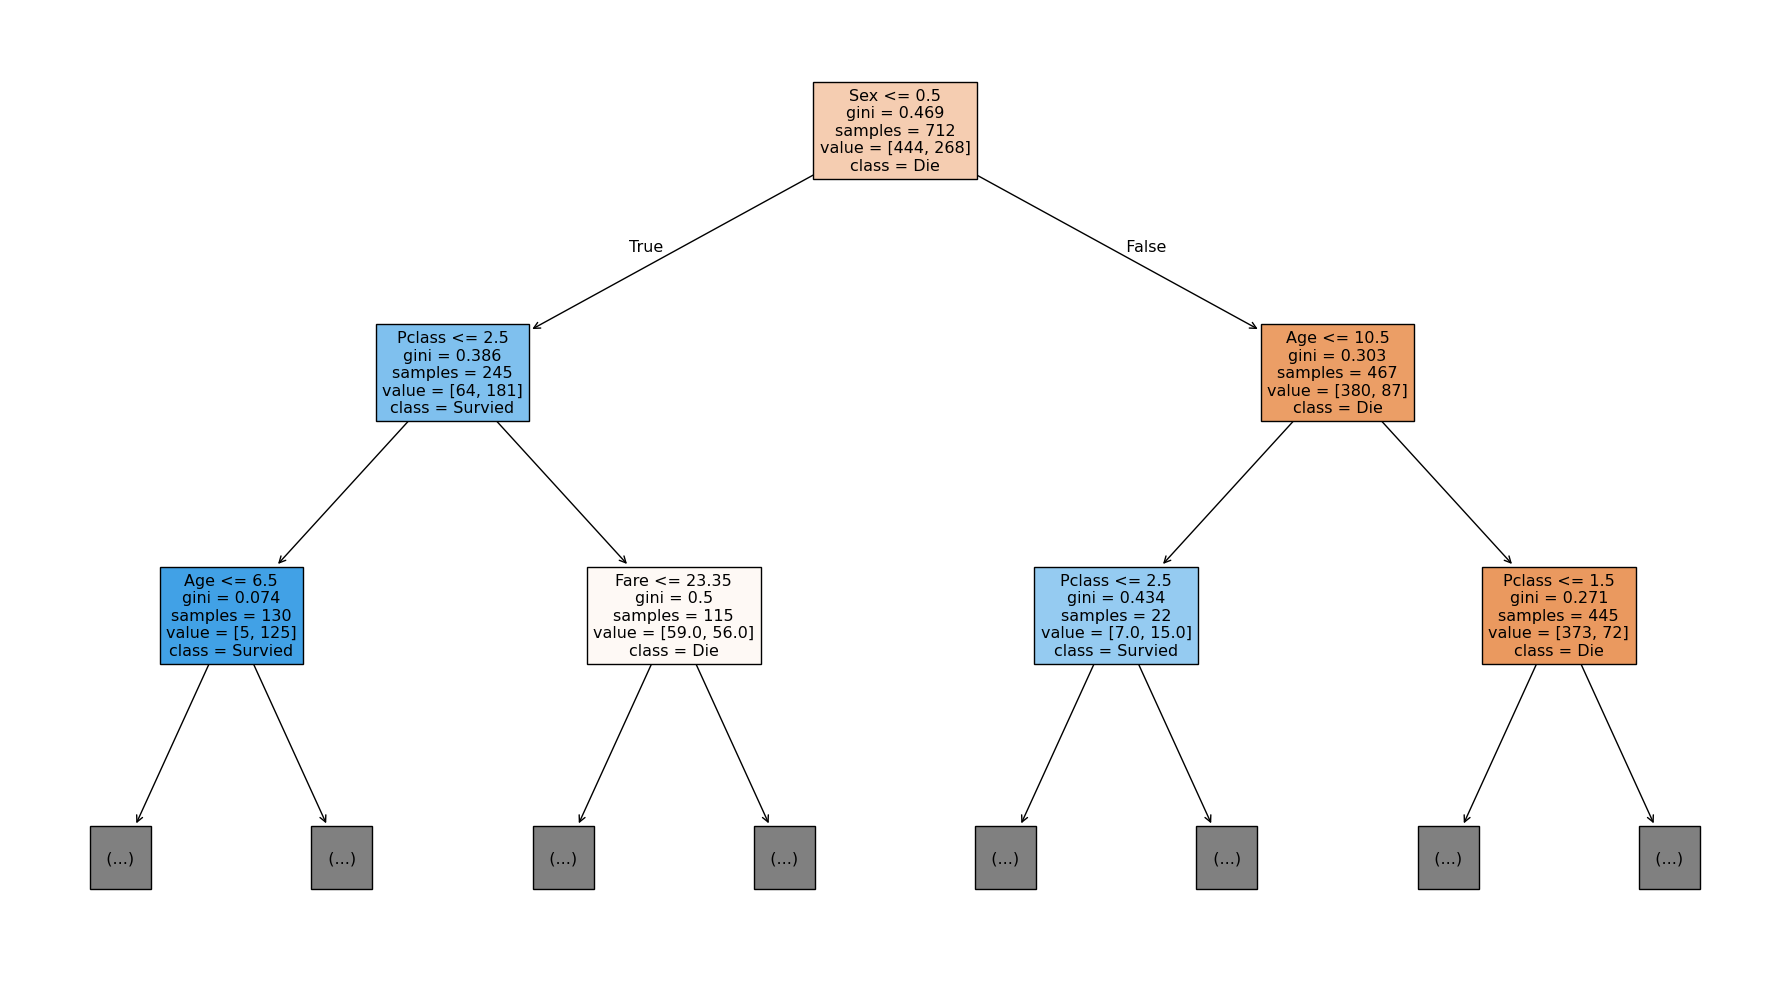

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize =(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names = ["Die","Survied"],
    filled = True,
    max_depth=2
)
plt.tight_layout()
plt.show()

# pre-pruning

for depth:2,accuracy:0.7653631284916201
for depth:3,accuracy:0.7988826815642458
for depth:4,accuracy:0.7988826815642458


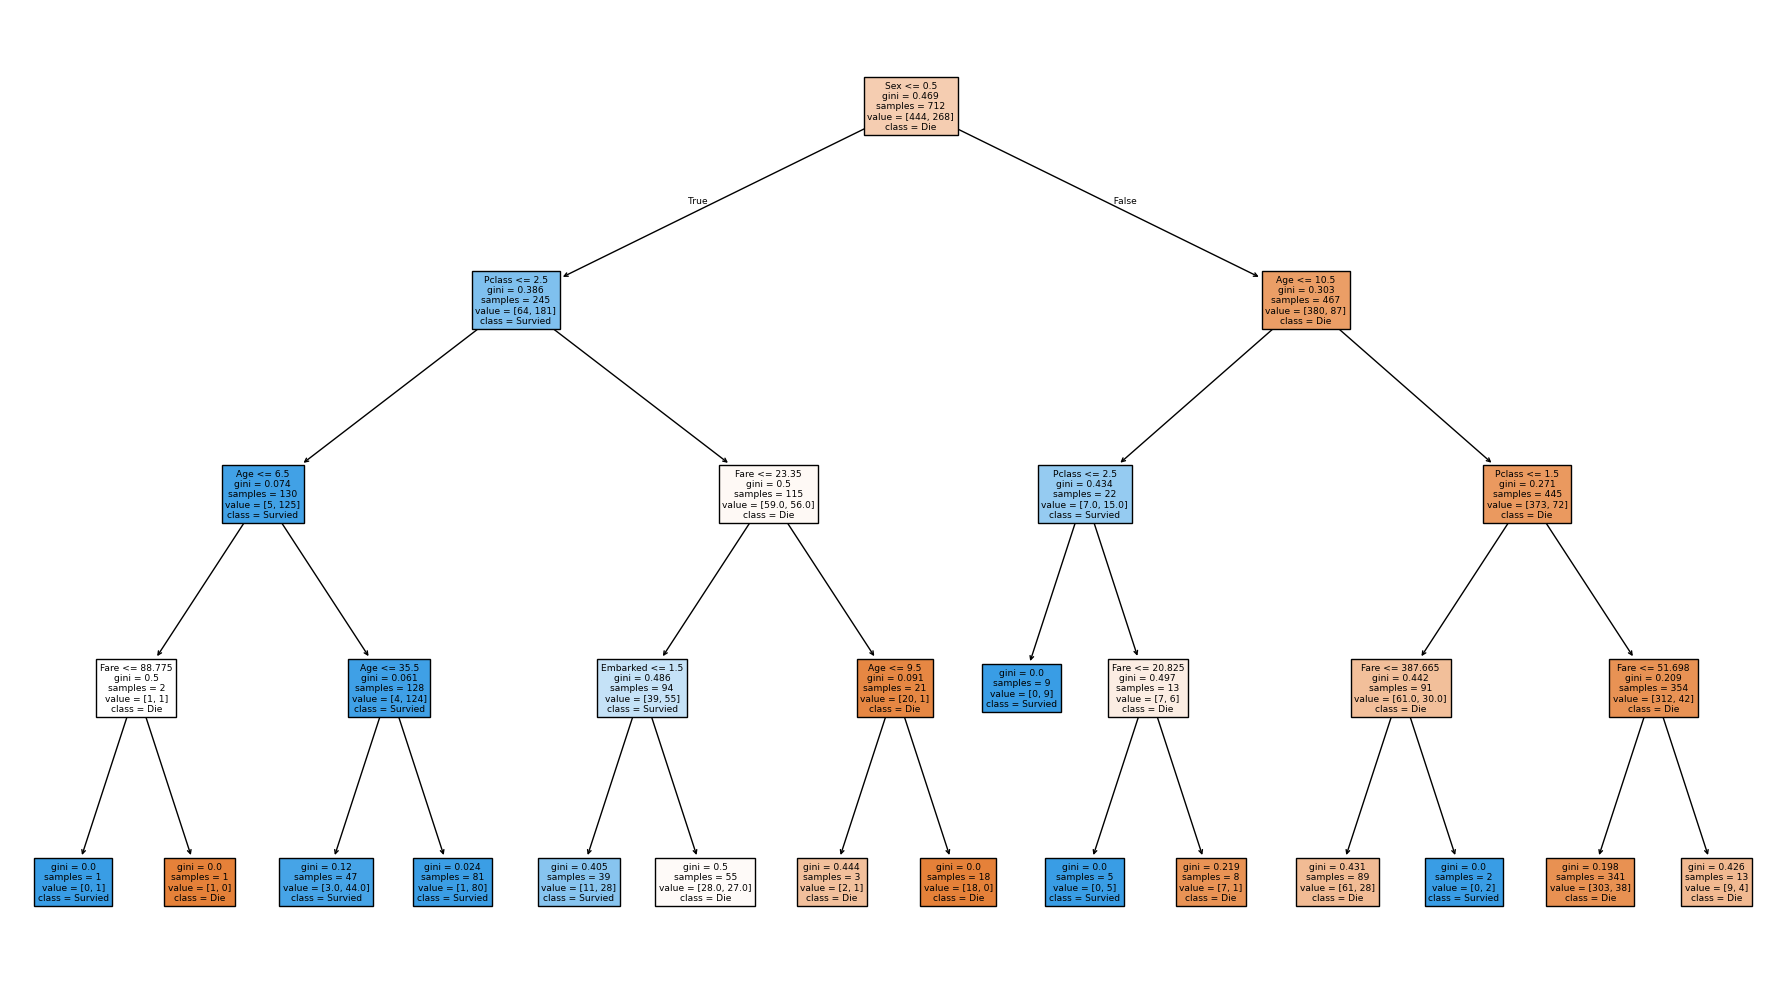

for depth:5,accuracy:0.7988826815642458
for depth:6,accuracy:0.8044692737430168
for depth:7,accuracy:0.8100558659217877
for depth:8,accuracy:0.8044692737430168
for depth:9,accuracy:0.7932960893854749
for depth:10,accuracy:0.8100558659217877


In [45]:
max_depth = [2,3,4,5,6,7,8,9,10]
for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train,y_train)

    acc = model.score(X_test,y_test)
    print(f"for depth:{depth},accuracy:{acc}")
    if depth == 4:
        plt.figure(figsize =(18,10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names = ["Die","Survied"],
            filled = True,
            
        )
        plt.tight_layout()
        plt.show()

for min samples:5,accuracy:0.8044692737430168
for min samples:10,accuracy:0.8379888268156425


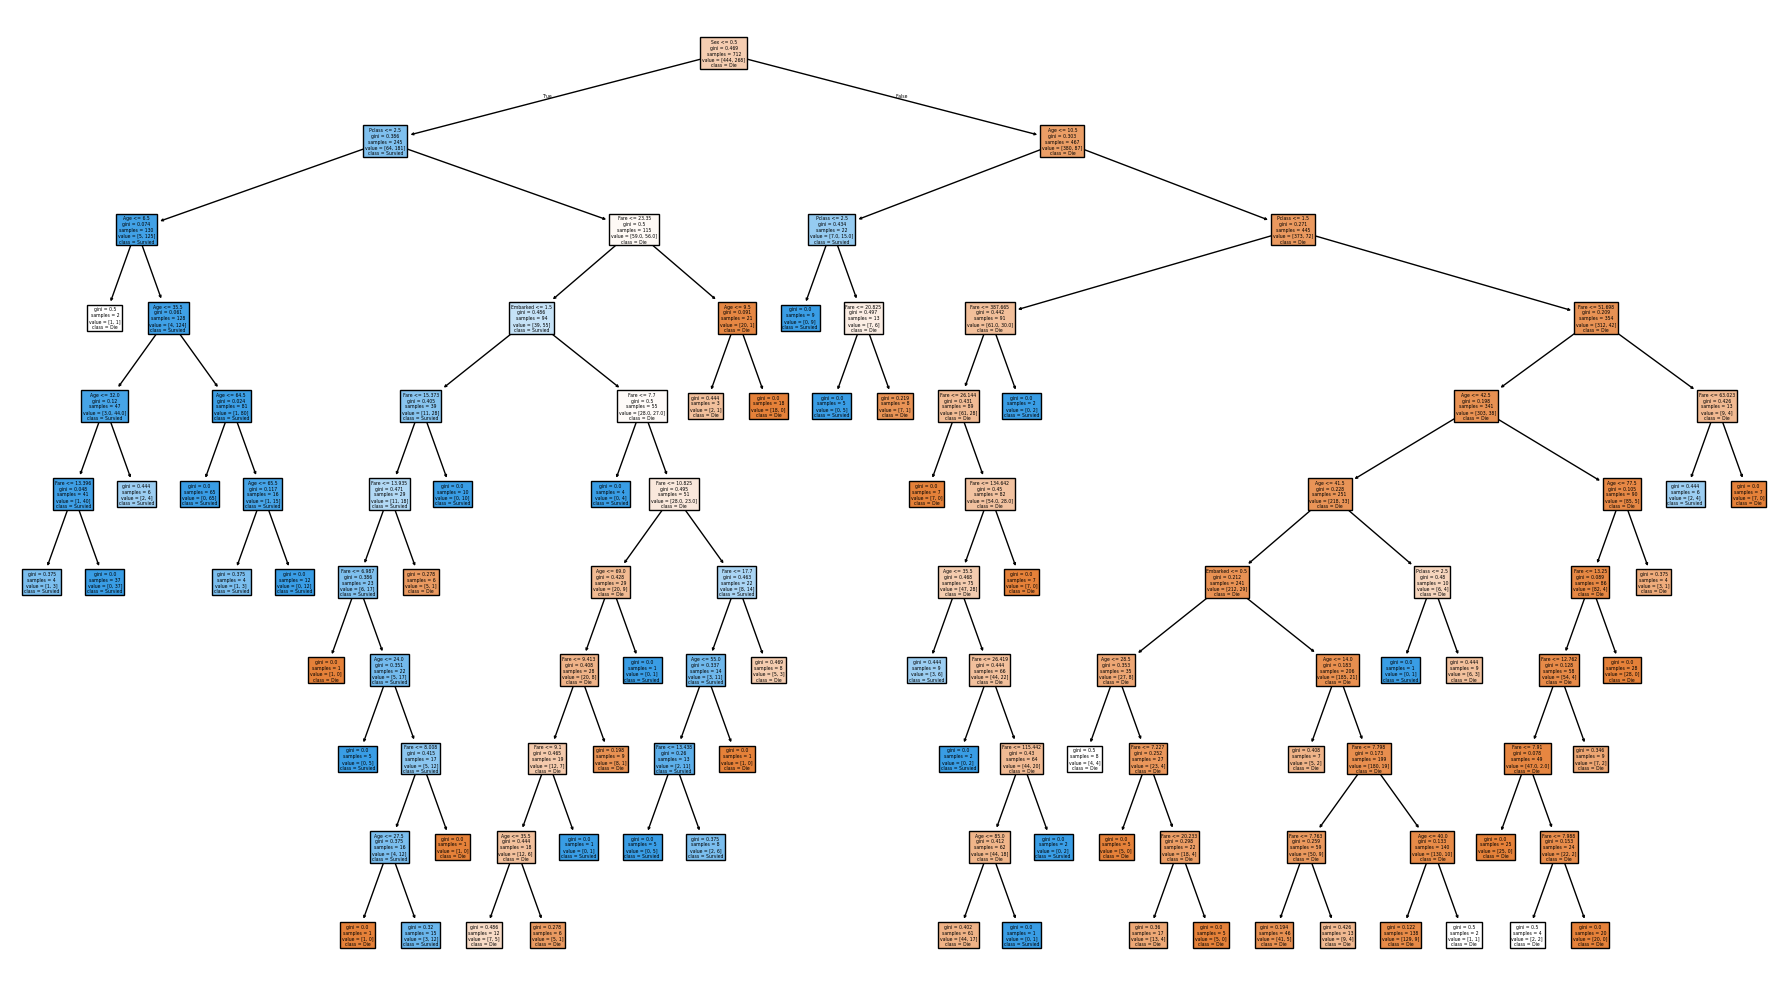

for min samples:15,accuracy:0.8379888268156425
for min samples:20,accuracy:0.8379888268156425
for min samples:25,accuracy:0.8212290502793296
for min samples:30,accuracy:0.8100558659217877


In [46]:
min_samples_splits = [5,10,15,20,25,30]
for split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=10,min_samples_split=split)
    model.fit(X_train,y_train)

    acc = model.score(X_test,y_test)
    print(f"for min samples:{split},accuracy:{acc}")
    if split == 10:
        plt.figure(figsize =(18,10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names = ["Die","Survied"],
            filled = True,
            
        )
        plt.tight_layout()
        plt.show()
    

# Post-Pruning

In [47]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 6.68806849e-05 1.45921494e-04
 1.84428555e-04 2.00642055e-04 2.34082397e-04 2.34082397e-04
 3.51123596e-04 4.68164794e-04 4.68164794e-04 5.61797753e-04
 6.24219725e-04 6.67991230e-04 7.02247191e-04 7.02247191e-04
 8.19288390e-04 8.19288390e-04 8.32292967e-04 8.42696629e-04
 8.42696629e-04 8.42696629e-04 8.94231048e-04 8.99610781e-04
 9.24769963e-04 9.36329588e-04 9.36329588e-04 9.36329588e-04
 9.88347898e-04 1.00253471e-03 1.05337079e-03 1.07400895e-03
 1.08038029e-03 1.11865144e-03 1.12359551e-03 1.12359551e-03
 1.13139825e-03 1.17041199e-03 1.18841832e-03 1.22566125e-03
 1.22893258e-03 1.22893258e-03 1.24361593e-03 1.24843945e-03
 1.27565833e-03 1.30996111e-03 1.33761370e-03 1.37044603e-03
 1.46301498e-03 1.47927070e-03 1.51142557e-03 1.54072312e-03
 1.56675436e-03 1.60434338e-03 1.66892062e-03 1.76144762e-03
 1.86751451e-03 2.10674157e-03 2.34082397e-03 2.41226470e-03
 2.64273538e-03 2.69412911e-03 3.43770913e-03 3.56327570e-03
 5.47433606e-03 9.055400

In [50]:
# train model for all alphas
trees = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42,ccp_alpha = alpha)
    model.fit(X_train,y_train)
    trees.append((model,alpha))

In [53]:
best_acc = 0
best_alpha = 0
for model,alpha in trees:
    curr_acc = model.score(X_test,y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha
print("Best Accuracy:",best_acc)
print("Best alpha:",best_alpha)

Best Accuracy: 0.8379888268156425
Best alpha: 0.0015407231242023183


In [54]:
best_model = DecisionTreeClassifier(random_state=42,ccp_alpha = best_alpha)
best_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0015407231242023183),
                       random_state=42)

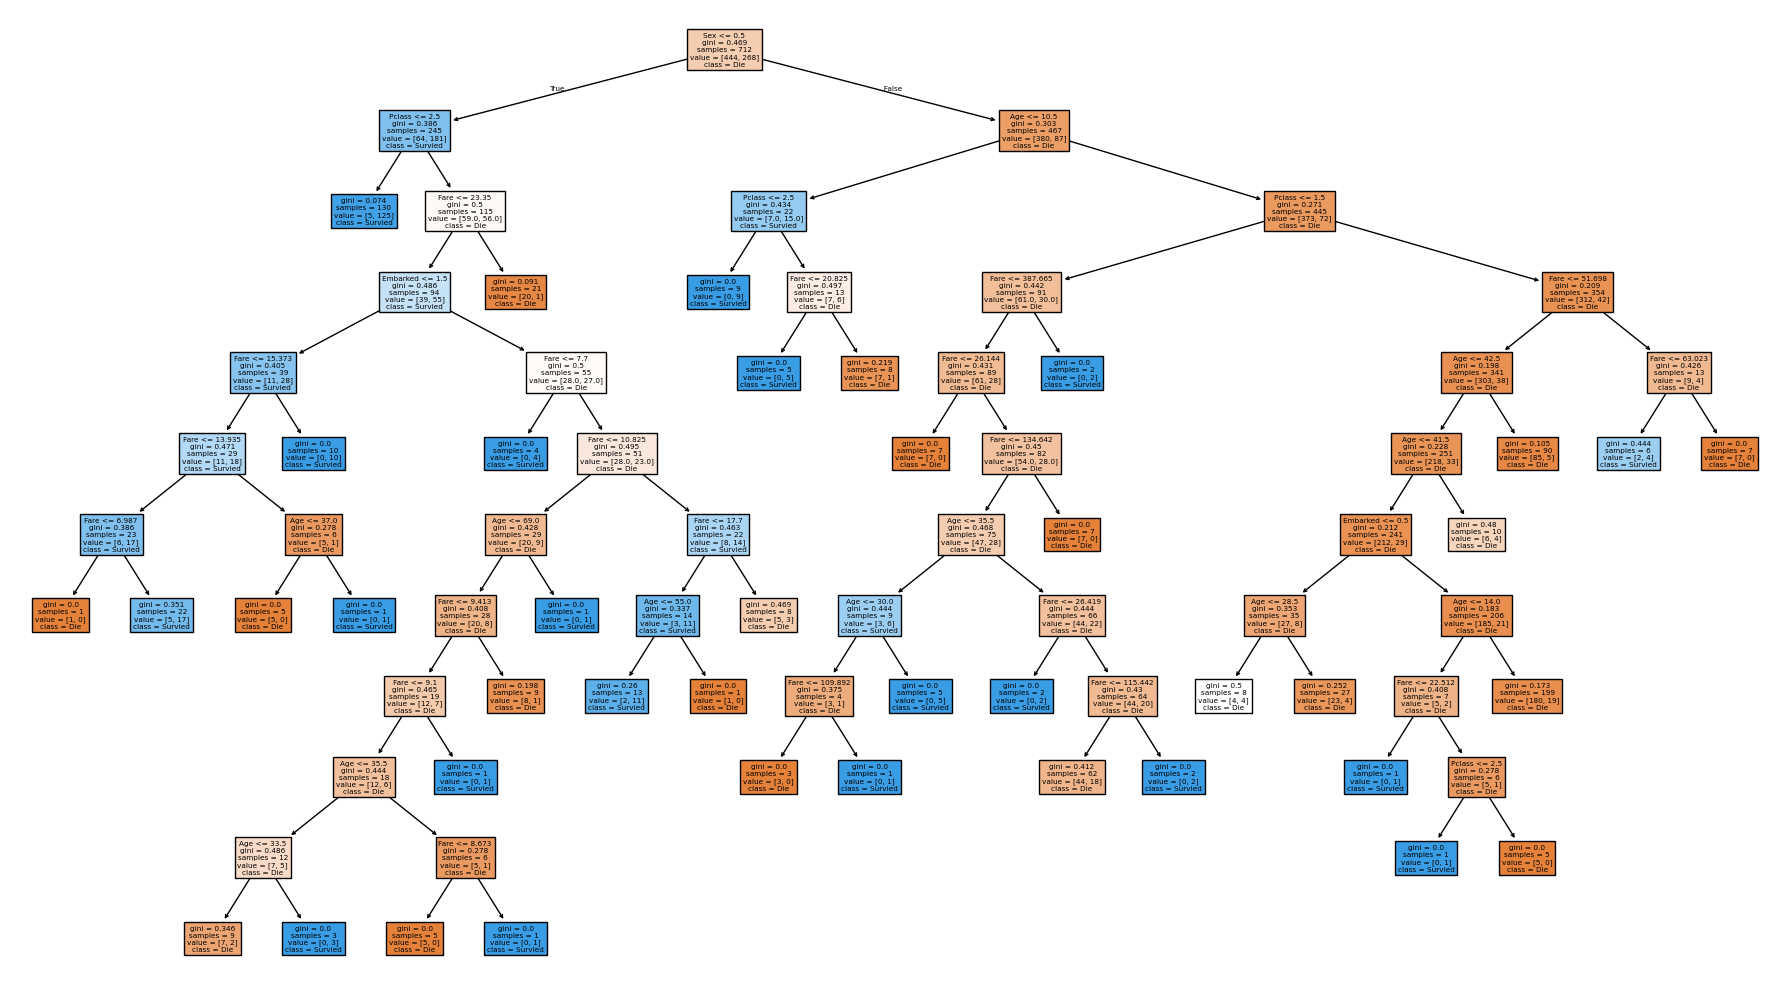

In [55]:
plt.figure(figsize =(18,10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names = ["Die","Survied"],
    filled = True,
)
plt.tight_layout()
plt.show()

In [57]:
print(best_model.score(X_test,y_test))

0.8379888268156425
